### correlacion

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  DataFrame de pandas llamado 'df_cod'
# leer un conjunto de datos CSV usando: 
df_cod = pd.read_csv('dataset/data/sample_4M_cod.csv')

In [3]:
df_cod.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'AttackCod'],
      dtype='object')

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df_cod.corr()
valoresNulos =correlation_matrix.isna().sum().sum()
cols_with_nan = correlation_matrix.columns[correlation_matrix.isna().any()].tolist()

# Configura el tamaño de la figura
plt.figure(figsize=(20, 18))

# Crea un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', linewidths=0.5, fmt=".2f")

# Guarda la figura en un archivo .jpg antes de mostrarla
plt.tight_layout()
plt.savefig('data/correlation_matrix.jpg', format='jpg', dpi=300)

# Muestra el gráfico
plt.tight_layout()
plt.show()

print(valoresNulos)
print(cols_with_nan)

# Calcula las correlaciones con "Attack_DDoS"
correlations_with_target = correlation_matrix["AttackCod"]
#print(correlations_with_target)
# Ordena las correlaciones en orden descendente (mayor a menor)
sorted_correlations = correlations_with_target.sort_values(ascending=False)
print(sorted_correlations)


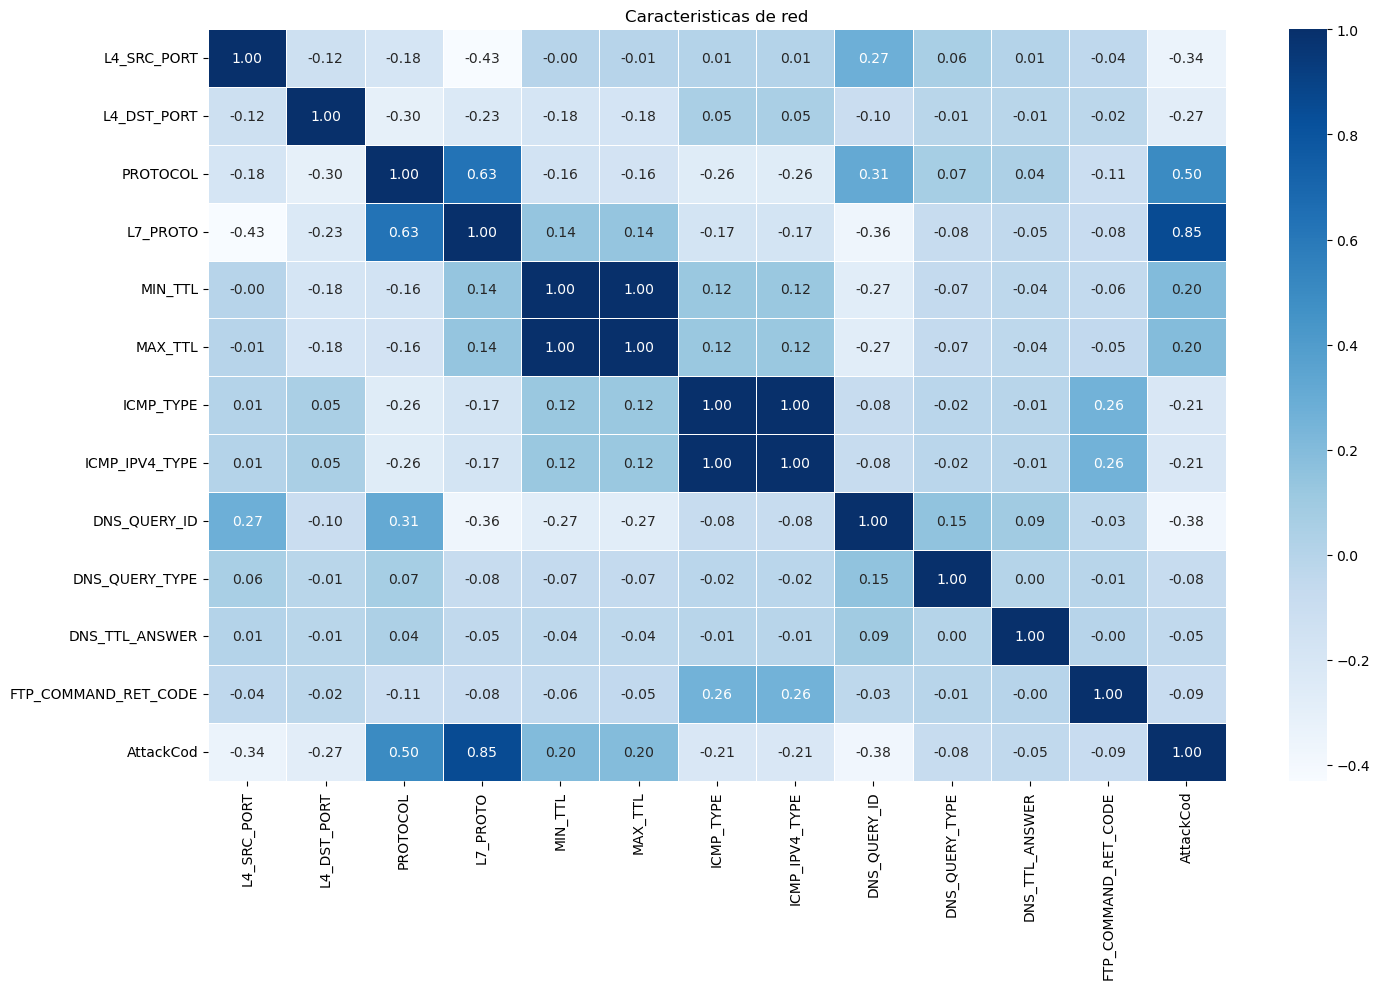

Caracteristicas de red:
AttackCod               1.000000
L7_PROTO                0.850337
PROTOCOL                0.497658
MIN_TTL                 0.201897
MAX_TTL                 0.199607
DNS_TTL_ANSWER         -0.049638
DNS_QUERY_TYPE         -0.082823
FTP_COMMAND_RET_CODE   -0.088298
ICMP_IPV4_TYPE         -0.207933
ICMP_TYPE              -0.207933
L4_DST_PORT            -0.273862
L4_SRC_PORT            -0.343349
DNS_QUERY_ID           -0.376983
Name: AttackCod, dtype: float64


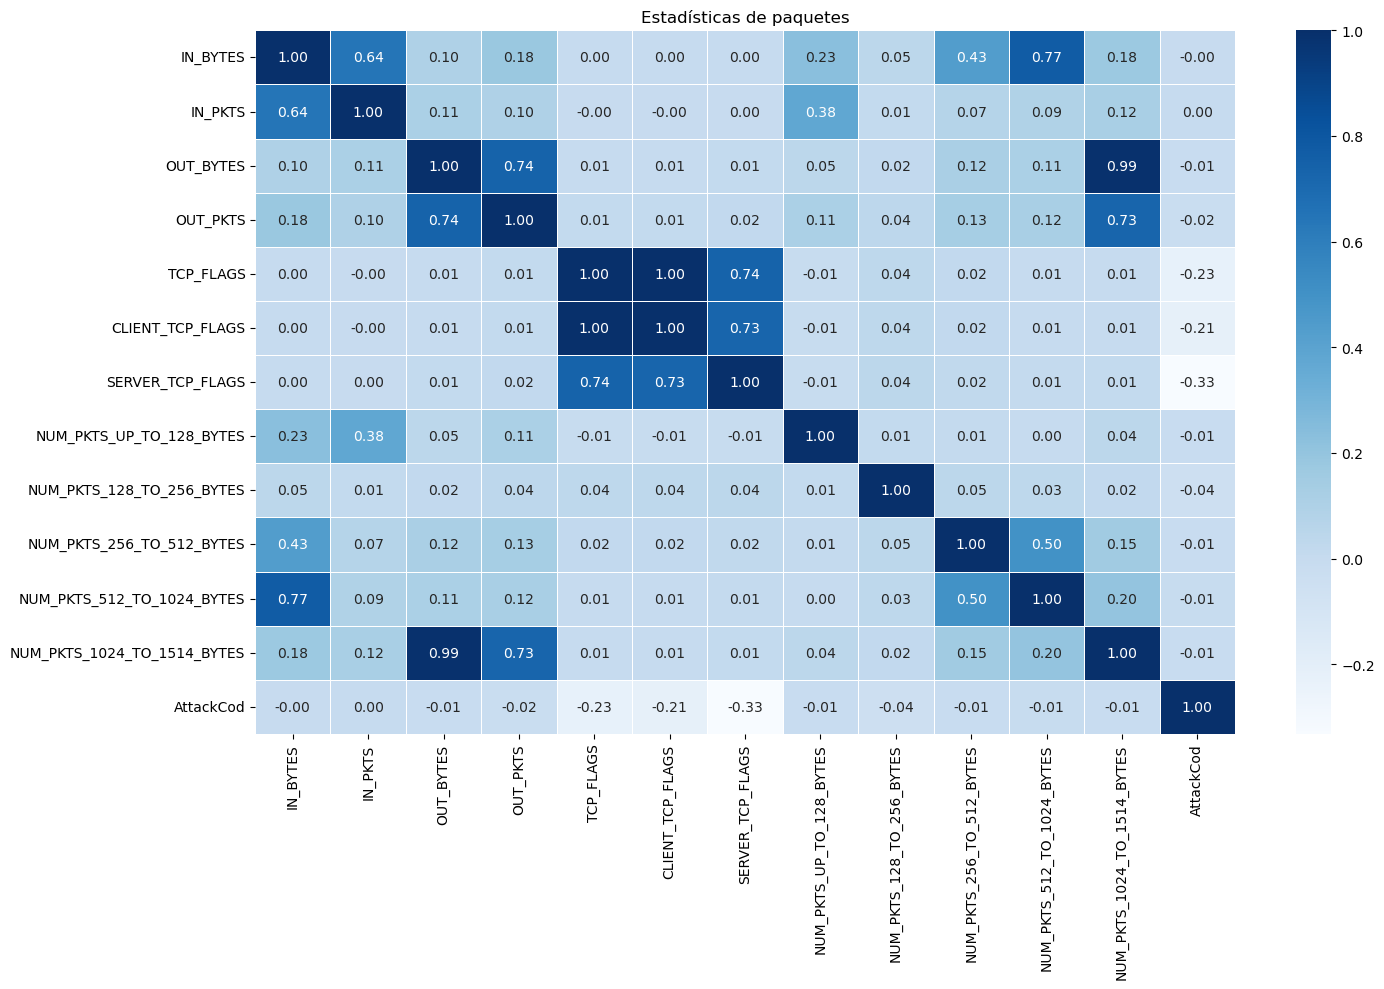

Estadísticas de paquetes:
AttackCod                      1.000000
IN_PKTS                        0.004669
IN_BYTES                      -0.003156
NUM_PKTS_512_TO_1024_BYTES    -0.007863
NUM_PKTS_1024_TO_1514_BYTES   -0.012912
NUM_PKTS_UP_TO_128_BYTES      -0.012937
OUT_BYTES                     -0.013011
NUM_PKTS_256_TO_512_BYTES     -0.014405
OUT_PKTS                      -0.017293
NUM_PKTS_128_TO_256_BYTES     -0.042774
CLIENT_TCP_FLAGS              -0.213530
TCP_FLAGS                     -0.225094
SERVER_TCP_FLAGS              -0.331855
Name: AttackCod, dtype: float64


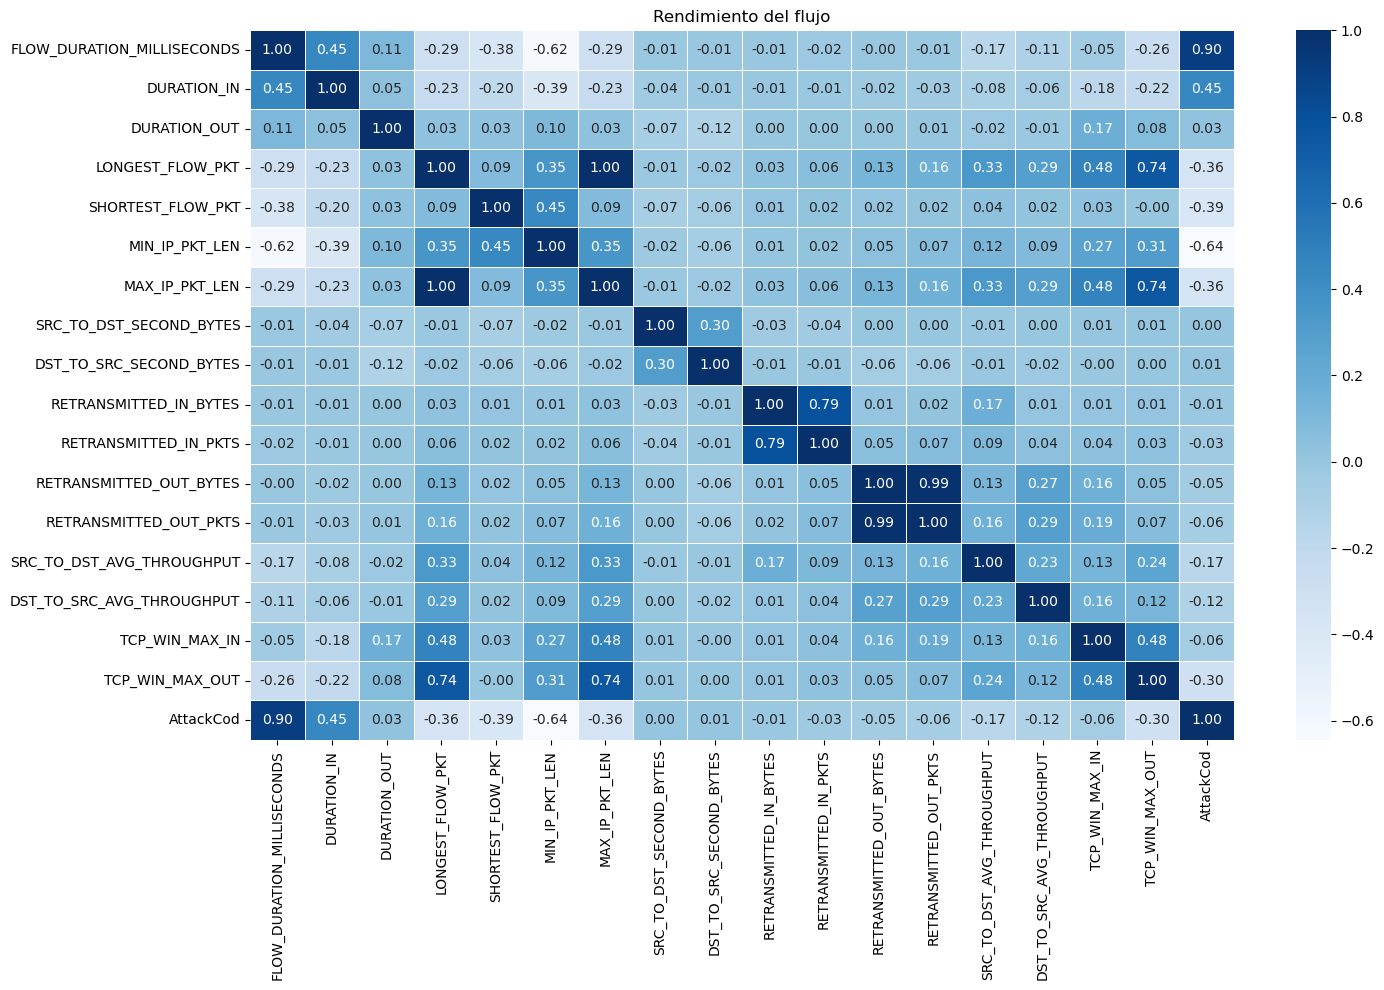

Rendimiento del flujo:
AttackCod                     1.000000
FLOW_DURATION_MILLISECONDS    0.903788
DURATION_IN                   0.447843
DURATION_OUT                  0.029091
DST_TO_SRC_SECOND_BYTES       0.009130
SRC_TO_DST_SECOND_BYTES       0.004967
RETRANSMITTED_IN_BYTES       -0.013756
RETRANSMITTED_IN_PKTS        -0.031955
RETRANSMITTED_OUT_BYTES      -0.047866
TCP_WIN_MAX_IN               -0.056894
RETRANSMITTED_OUT_PKTS       -0.061207
DST_TO_SRC_AVG_THROUGHPUT    -0.120828
SRC_TO_DST_AVG_THROUGHPUT    -0.168482
TCP_WIN_MAX_OUT              -0.300751
LONGEST_FLOW_PKT             -0.355492
MAX_IP_PKT_LEN               -0.355492
SHORTEST_FLOW_PKT            -0.387315
MIN_IP_PKT_LEN               -0.644830
Name: AttackCod, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# df_cod es el DataFrame

# Subgrupo 1: Características de Tráfico de Red
network_features = [
    'L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO',
    'MIN_TTL', 'MAX_TTL', 'ICMP_TYPE', 'ICMP_IPV4_TYPE',
    'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER',
    'FTP_COMMAND_RET_CODE','AttackCod'
]

# Subgrupo 2: Estadísticas de Paquetes y TCP Flags
packet_stats = [
    'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
    'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
    'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
    'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
    'NUM_PKTS_1024_TO_1514_BYTES','AttackCod'
]

# Subgrupo 3: Rendimiento y Características Avanzadas de Flujo
flow_performance = [
    'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT',
    'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
    'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
    'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
    'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
    'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
    'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'AttackCod'
]


# Función para crear un mapa de calor de un subconjunto
def create_heatmap(df, features, title, filename):
    plt.figure(figsize=(15, 10))    
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='mako_r', linewidths=0.5, fmt=".2f")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename, format='jpg', dpi=300)
    plt.show()
    # Muestra las correlaciones con AttackCod en orden descendente
    if 'AttackCod' in features:
        print(f"{title}:")
        correlations_with_target = correlation_matrix['AttackCod'].sort_values(ascending=False)
        print(correlations_with_target)
    

# Crear y mostrar los mapas de calor para cada subconjunto
create_heatmap(df_cod, network_features, 'Caracteristicas de red', 'network_features_heatmap.jpg')
create_heatmap(df_cod, packet_stats, 'Estadísticas de paquetes', 'packet_stats_heatmap.jpg')
create_heatmap(df_cod, flow_performance, 'Rendimiento del flujo', 'flow_performance_heatmap.jpg')
